In [1]:
#importing libraries
import numpy as np
import pandas as pd

# Load Datasets

The low_memory option is not properly deprecated, but it should be, since it does not actually do anything differently[source]

The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. Specifying dtypes (should always be done)
adding

dtype={'user_id': int}
to the pd.read_csv() call will make pandas know when it starts reading the file, that this is only integers.

In [245]:

def loadDataset(file_name):
    df = pd.read_csv(file_name, encoding = "ISO-8859-1", on_bad_lines='skip',  dtype={"Alexa_Rank": 'float64'})
    return df

In [246]:
df_train = loadDataset("Train_Dataset/Training_data_INPDS.csv")


C:\Users\PC1\AppData\Local\Temp/ipykernel_77868/2351554269.py:1: DtypeWarning: Columns (9,10,13,15,17,18,20,21,24,25,27,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  df_train = loadDataset("Train_Dataset/Training_data_INPDS.csv")


 'to_numeric' operation of pandas which will throw up an error when a string value is met. This error will be handled by 'coerce' which forces the content to null. We then use the 'notnull' operation to filter this particular row.

In [247]:
df_train['entropy'] = pd.to_numeric(df_train['entropy'], errors='coerce').notnull()

In [248]:
df_train['len'] = pd.to_numeric(df_train['len'], errors='coerce').notnull()

In [249]:
#df_train['label'] = pd.to_numeric(df_train['label'], errors='coerce').notnull()

In [250]:
df_train.to_csv("Train_Dataset/Training_data.csv", index=False)

In [ ]:
#'subdomain','obfuscate_at_sign','numeric_percentage','Registrant_Name','Domain_Age','Emails','Organization','Name_Server_Count', 

In [2]:

def loadDataset(file_name):
    df = pd.read_csv(file_name, encoding = "ISO-8859-1", on_bad_lines='skip',  dtype={"Alexa_Rank": 'float64',"entropy": 'float64',"len": 'int64', 'Country': 'string', 'IP': 'string', 'Domain' : 'string', 'subdomain': 'float64','obfuscate_at_sign': 'float64','numeric_percentage': 'float64','Registrant_Name': 'string','Domain_Age': 'string','Emails': 'string','Organization': 'string','Name_Server_Count': 'float64' ,'Creation_Date_Time' : 'string', '1gram' : 'string','tld': 'string','3gram': 'string','2gram': 'string','label': 'float64'})
    return df

In [20]:
df_train = loadDataset("Train_Dataset/Training_data.csv")

C:\Users\PC1\AppData\Local\Temp/ipykernel_1800/3691612657.py:1: DtypeWarning: Columns (10,18,25,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  df_train = loadDataset("Train_Dataset/Training_data.csv")


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500197 entries, 0 to 500196
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389638 non-null  string 
 1   ASN                 389696 non-null  float64
 2   TTL                 500197 non-null  int64  
 3   IP                  390902 non-null  string 
 4   Domain              500197 non-null  string 
 5   State               222064 non-null  object 
 6   Registrant_Name     13533 non-null   string 
 7   Country.1           257262 non-null  object 
 8   Creation_Date_Time  366834 non-null  string 
 9   hex_32              500197 non-null  float64
 10  hex_8               500197 non-null  object 
 11  Domain_Name         401909 non-null  object 
 12  Alexa_Rank          445331 non-null  float64
 13  subdomain           500195 non-null  float64
 14  Organization        203902 non-null  string 
 15  len                 500197 non-nul

# Adding  Y_test for LABEl test Data values for phishing _Bengin domaines 

In [30]:
df_test = loadDataset("Train_Dataset/Test_dataset_NIDS.csv")

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_packet           2126 non-null   int64  
 1   IP_src              2126 non-null   object 
 2   Domain              2126 non-null   string 
 3   subdomain           2126 non-null   float64
 4   sum                 2126 non-null   int64  
 5   obfuscate_at_sign   2126 non-null   float64
 6   UDP_sport           2126 non-null   int64  
 7   numeric_percentage  2126 non-null   float64
 8   IP                  2126 non-null   string 
 9   Registrant_Name     2126 non-null   string 
 10  Domain_Age          2126 non-null   string 
 11  Emails              2126 non-null   string 
 12  Organization        0 non-null      string 
 13  Name_Server_Count   2126 non-null   float64
 14  UDP_dport           2126 non-null   int64  
 15  DNS_id              2126 non-null   int64  
 16  1gram 

In [25]:
df_test['label']=" "
df_test = df_test[['ID_packet', 'IP_src', 'Domain', 'subdomain', 'sum','obfuscate_at_sign', 'UDP_sport', 'numeric_percentage', 'IP','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Name_Server_Count', 'UDP_dport', 'DNS_id', '1gram', '2gram', '3gram','entropy', 'Country', 'tld', 'DNS_qr', 'DNS_qd', 'DNS_qdtype','type_table', 'Creation_Date_Time', 'Exp_Date_Time','whois_updatedDate', 'dot_count', 'len', 'digit_count', 'special_count','hyphen_count', 'double_slash', 'single_slash', 'at_the_rate','Alexa_Rank', 'label']]

df_test 

,ID_packet,IP_src,UDP_sport,IP,UDP_dport,DNS_id,Domain,1gram,2gram,3gram,...,whois_updatedDate,dot_count,len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,label
0,2,192.168.8.1,53,10.0.2.15,47533,47210,ecnavi.jp,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']","['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']",...,-1,1,9,0,0,0,0,0,0,
1,78,192.168.8.1,53,10.0.2.15,43722,7987,ecnavi.jp,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']","['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']",...,-1,1,9,0,0,0,0,0,0,
2,80,192.168.8.1,53,10.0.2.15,47296,30024,hubpages.com,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....","['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...",...,-1,1,12,0,0,0,0,0,0,
3,81,192.168.8.1,53,10.0.2.15,47296,54860,hubpages.com,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....","['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...",...,-1,1,12,0,0,0,0,0,0,
4,98,192.168.8.1,53,10.0.2.15,55060,48426,discover.hubpages.com,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....","['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...",...,-1,2,21,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,23221,192.168.8.1,53,10.0.2.15,34276,43676,c1781279.ferozo.com,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...","['c1', '17', '78', '81', '12', '27', '79', '9....","['c17', '178', '781', '812', '127', '279', '79...",...,-1,2,19,7,0,0,0,0,0,
2122,23222,192.168.8.1,53,10.0.2.15,33341,34713,c1781279.ferozo.com,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...","['c1', '17', '78', '81', '12', '27', '79', '9....","['c17', '178', '781', '812', '127', '279', '79...",...,-1,2,19,7,0,0,0,0,0,
2123,23223,192.168.8.1,53,10.0.2.15,60738,44402,rusnod.ru,"{'d', 'n', '.', 'o', 's', 'u', 'r'}","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']","['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']",...,-1,1,9,0,0,0,0,0,0,
2124,23224,192.168.8.1,53,10.0.2.15,50988,30583,rusnod.ru,"{'d', 'n', '.', 'o', 's', 'u', 'r'}","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']","['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']",...,-1,1,9,0,0,0,0,0,0,


In [179]:
for x in df_test.index:
    idt = df_test['ID_packet'][x]
    if idt < 14686 :      # based on pcap capture packets id of ligitim and phishing URL I found that 18498 is the id packet of  #the first phishing url
        df_test['label'][x] = 0.0   # so i aded to the dataest the laebel comlum based on this aspect
    else :     
        df_test['label'][x] = 1.0
df_test

C:\Users\PC1\AppData\Local\Temp/ipykernel_12844/3843331942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'][x] = 0.0   # so i aded to the dataest the laebel comlum based on this aspect
C:\Users\PC1\AppData\Local\Temp/ipykernel_12844/3843331942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'][x] = 1.0


,ID_packet,IP_src,UDP_sport,IP,UDP_dport,DNS_id,Domain,Alexa_Rank,1gram,2gram,...,whois_updatedDate,dot_count,len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,label
0,2,192.168.8.1,53,10.0.2.15,47533,47210,ecnavi.jp,5435.0,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",...,-1,1,9,0,0,0,0,0,0,0.0
1,78,192.168.8.1,53,10.0.2.15,43722,7987,ecnavi.jp,5435.0,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",...,-1,1,9,0,0,0,0,0,0,0.0
2,80,192.168.8.1,53,10.0.2.15,47296,30024,hubpages.com,3231.0,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",...,-1,1,12,0,0,0,0,0,0,0.0
3,81,192.168.8.1,53,10.0.2.15,47296,54860,hubpages.com,3231.0,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",...,-1,1,12,0,0,0,0,0,0,0.0
4,98,192.168.8.1,53,10.0.2.15,55060,48426,discover.hubpages.com,3231.0,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",...,-1,2,21,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,23221,192.168.8.1,53,10.0.2.15,34276,43676,c1781279.ferozo.com,-1.0,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...","['c1', '17', '78', '81', '12', '27', '79', '9....",...,-1,2,19,7,0,0,0,0,0,1.0
2122,23222,192.168.8.1,53,10.0.2.15,33341,34713,c1781279.ferozo.com,-1.0,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...","['c1', '17', '78', '81', '12', '27', '79', '9....",...,-1,2,19,7,0,0,0,0,0,1.0
2123,23223,192.168.8.1,53,10.0.2.15,60738,44402,rusnod.ru,-1.0,"{'d', 'n', '.', 'o', 's', 'u', 'r'}","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",...,-1,1,9,0,0,0,0,0,0,1.0
2124,23224,192.168.8.1,53,10.0.2.15,50988,30583,rusnod.ru,-1.0,"{'d', 'n', '.', 'o', 's', 'u', 'r'}","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",...,-1,1,9,0,0,0,0,0,0,1.0


In [180]:
df_test = df_test.to_csv("Train_Dataset/Testing_data.csv", index=False)

In [45]:
df_test = loadDataset("Train_Dataset/Testing_data.csv")

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_packet           2126 non-null   int64  
 1   IP_src              2126 non-null   object 
 2   Domain              2126 non-null   string 
 3   subdomain           2126 non-null   float64
 4   sum                 2126 non-null   int64  
 5   obfuscate_at_sign   2126 non-null   float64
 6   UDP_sport           2126 non-null   int64  
 7   numeric_percentage  2126 non-null   float64
 8   IP                  2126 non-null   string 
 9   Registrant_Name     2126 non-null   string 
 10  Domain_Age          2126 non-null   string 
 11  Emails              2126 non-null   string 
 12  Organization        0 non-null      string 
 13  Name_Server_Count   2126 non-null   float64
 14  UDP_dport           2126 non-null   int64  
 15  DNS_id              2126 non-null   int64  
 16  1gram 

In [47]:
df_train.columns

Index(['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name',
       'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name',
       'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word',
       'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy',
       'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage',
       'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram',
       'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'label'],
      dtype='object')

In [48]:
df_test.columns

Index(['ID_packet', 'IP_src', 'Domain', 'subdomain', 'sum',
       'obfuscate_at_sign', 'UDP_sport', 'numeric_percentage', 'IP',
       'Registrant_Name', 'Domain_Age', 'Emails', 'Organization',
       'Name_Server_Count', 'UDP_dport', 'DNS_id', '1gram', '2gram', '3gram',
       'entropy', 'Country', 'tld', 'DNS_qr', 'DNS_qd', 'DNS_qdtype',
       'type_table', 'Creation_Date_Time', 'Exp_Date_Time',
       'whois_updatedDate', 'dot_count', 'len', 'digit_count', 'special_count',
       'hyphen_count', 'double_slash', 'single_slash', 'at_the_rate',
       'Alexa_Rank', 'label'],
      dtype='object')

In [49]:
df_train.label.value_counts()

0.0    495288
1.0      4908
Name: label, dtype: int64

In [50]:
# Store target variable (Label) of training data in a safe place

In [51]:
Label_train = df_train.label

In [52]:
Label_train

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
500192    0.0
500193    0.0
500194    0.0
500195    0.0
500196    0.0
Name: label, Length: 500197, dtype: float64

# Ensuring correct sequence of columns 

In [53]:
df_test = df_test.to_csv("Train_Dataset/Testing_data.csv", header=['ID_packet', 'IP_src', 'Domain', 'subdomain', 'sum','obfuscate_at_sign', 'UDP_sport', 'numeric_percentage', 'IP','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Name_Server_Count', 'UDP_dport', 'DNS_id', '1gram', '2gram', '3gram','entropy', 'Country', 'tld', 'DNS_qr', 'DNS_qd', 'DNS_qdtype','type_table', 'Creation_Date_Time', 'Exp_Date_Time','whois_updatedDate', 'dot_count', 'len', 'digit_count', 'special_count','hyphen_count', 'double_slash', 'single_slash', 'at_the_rate','Alexa_Rank', 'label'], index=False)

In [54]:
df_test = loadDataset("Train_Dataset/Testing_data.csv")

In [55]:
df_test.columns

Index(['ID_packet', 'IP_src', 'Domain', 'subdomain', 'sum',
       'obfuscate_at_sign', 'UDP_sport', 'numeric_percentage', 'IP',
       'Registrant_Name', 'Domain_Age', 'Emails', 'Organization',
       'Name_Server_Count', 'UDP_dport', 'DNS_id', '1gram', '2gram', '3gram',
       'entropy', 'Country', 'tld', 'DNS_qr', 'DNS_qd', 'DNS_qdtype',
       'type_table', 'Creation_Date_Time', 'Exp_Date_Time',
       'whois_updatedDate', 'dot_count', 'len', 'digit_count', 'special_count',
       'hyphen_count', 'double_slash', 'single_slash', 'at_the_rate',
       'Alexa_Rank', 'label'],
      dtype='object')

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_packet           2126 non-null   int64  
 1   IP_src              2126 non-null   object 
 2   Domain              2126 non-null   string 
 3   subdomain           2126 non-null   float64
 4   sum                 2126 non-null   int64  
 5   obfuscate_at_sign   2126 non-null   float64
 6   UDP_sport           2126 non-null   int64  
 7   numeric_percentage  2126 non-null   float64
 8   IP                  2126 non-null   string 
 9   Registrant_Name     2126 non-null   string 
 10  Domain_Age          2126 non-null   string 
 11  Emails              2126 non-null   string 
 12  Organization        0 non-null      string 
 13  Name_Server_Count   2126 non-null   float64
 14  UDP_dport           2126 non-null   int64  
 15  DNS_id              2126 non-null   int64  
 16  1gram 

# Dropping Unessasry coloumns

In [72]:
df_train = df_train[['Country','IP', 'Domain',  'subdomain','obfuscate_at_sign', 'numeric_percentage','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Name_Server_Count','Creation_Date_Time','Alexa_Rank','len','1gram','entropy','tld','3gram','2gram','label']]  

df_test = df_test[['Country','IP', 'Domain', 'subdomain','obfuscate_at_sign', 'numeric_percentage','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Name_Server_Count','Creation_Date_Time','Alexa_Rank','len','1gram','entropy','tld','3gram','2gram','label']]

In [73]:
#df_train = df_train.drop(['ASN', 'TTL', 'State', 'Registrant_Name','Country.1', 'hex_32', 'hex_8', 'Domain_Name', 'subdomain', 'Organization', 'longest_word', 'oc_32', 'shortened', 'obfuscate_at_sign', 'Domain_Age',  'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', 'char_distribution', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'label'], axis='columns', inplace=True)

In [74]:
#df_test = df_test.drop(['ID_packet', 'IP_src', 'UDP_sport', 'UDP_dport', 'DNS_id', 'DNS_qr', 'DNS_qd', 'DNS_qdtype', 'type_table','Exp_Date_Time', 'whois_updatedDate', 'dot_count', 'digit_count', 'special_count', 'hyphen_count', 'double_slash','single_slash', 'at_the_rate'], axis='columns', inplace=True)

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500197 entries, 0 to 500196
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389638 non-null  string 
 1   IP                  390902 non-null  string 
 2   IP                  390902 non-null  string 
 3   Domain              500197 non-null  string 
 4   subdomain           500195 non-null  float64
 5   obfuscate_at_sign   500197 non-null  float64
 6   numeric_percentage  500197 non-null  float64
 7   Registrant_Name     13533 non-null   string 
 8   Domain_Age          445394 non-null  string 
 9   Emails              327161 non-null  string 
 10  Organization        203902 non-null  string 
 11  Name_Server_Count   445331 non-null  float64
 12  Creation_Date_Time  366834 non-null  string 
 13  Alexa_Rank          445331 non-null  float64
 14  len                 500197 non-null  int64  
 15  1gram               500197 non-nul

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2076 non-null   string 
 1   IP                  2126 non-null   string 
 2   IP                  2126 non-null   string 
 3   Domain              2126 non-null   string 
 4   subdomain           2126 non-null   float64
 5   obfuscate_at_sign   2126 non-null   float64
 6   numeric_percentage  2126 non-null   float64
 7   Registrant_Name     2126 non-null   string 
 8   Domain_Age          2126 non-null   string 
 9   Emails              2126 non-null   string 
 10  Organization        0 non-null      string 
 11  Name_Server_Count   2126 non-null   float64
 12  Creation_Date_Time  2126 non-null   string 
 13  Alexa_Rank          2116 non-null   float64
 14  len                 2126 non-null   int64  
 15  1gram               2126 non-null   string 
 16  entrop

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

Below, I  drop the target 'LABEL' from the training dataset and create a new DataFrame data that consists of training and test sets combined. I did this because I want to preprocess the data a little bit and make sure that any operations that I perform on the training set are also being done on the test data set.

# Concatenate training and test sets

In [77]:
df_train

,Country,IP,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,NL,145.14.145.41,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
1,<NA>,<NA>,<NA>,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
2,US,192.185.222.90,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,<NA>,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,...,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.0,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...,1.0
3,DE,217.20.113.46,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,<NA>,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,...,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.0,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...,1.0
4,NL,91.224.140.71,91.224.140.71,gg.gg,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,44394.0,1,['g' ; 'g'],1.0,gg,[],['gg'],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,<NA>,<NA>,<NA>,rossdawson.com,0.0,0.0,0.000000,<NA>,5199 days | 21:58:00.670791,abuse@godaddy.com,...,2.0,2006-02-05 02:21:21,876461.0,1,['r' ; 'o' ; 's' ; 's' ; 'd' ; 'a' ; 'w' ; 's'...,1.0,com,['ros' ; 'oss' ; 'ssd' ; 'sda' ; 'daw' ; 'aws'...,['ro' ; 'os' ; 'ss' ; 'sd' ; 'da' ; 'aw' ; 'ws...,0.0
500193,DE,217.160.0.178,217.160.0.178,weddingprime.de,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...,0.0
500194,<NA>,<NA>,<NA>,weddingprime.de,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...,0.0
500195,UA,195.128.17.206,195.128.17.206,vlasenko.net,0.0,0.0,0.000000,<NA>,7137 days | 10:20:41.804934,abuse@joker.com,...,6.0,2000-10-16 13:58:43,372895.0,1,['v' ; 'l' ; 'a' ; 's' ; 'e' ; 'n' ; 'k' ; 'o'],1.0,net,['vla' ; 'las' ; 'ase' ; 'sen' ; 'enk' ; 'nko'],['vl' ; 'la' ; 'as' ; 'se' ; 'en' ; 'nk' ; 'ko'],0.0


In [78]:
df_test

,Country,IP,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,United States,10.0.2.15,10.0.2.15,ecnavi.jp,0.0,0.0,0.000000,,0.0,,...,4.0,-1,5435.0,9,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",3.169925,jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",0.0
1,United States,10.0.2.15,10.0.2.15,ecnavi.jp,0.0,0.0,0.000000,,0.0,,...,4.0,-1,5435.0,9,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",3.169925,jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",0.0
2,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
3,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
4,United States,10.0.2.15,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
2122,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
2123,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0
2124,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0


In [79]:

kdd_train = pd.concat([df_train,df_test], axis=0)

In [80]:
kdd_train

,Country,IP,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,NL,145.14.145.41,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.000000,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
1,<NA>,<NA>,<NA>,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.000000,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
2,US,192.185.222.90,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,<NA>,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,...,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.000000,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...,1.0
3,DE,217.20.113.46,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,<NA>,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,...,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.000000,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...,1.0
4,NL,91.224.140.71,91.224.140.71,gg.gg,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,44394.0,1,['g' ; 'g'],1.000000,gg,[],['gg'],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
2122,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
2123,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0
2124,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0


In [81]:
kdd_train.to_csv("Train_Dataset/INPIDS_datasets_full_2.csv", index=False)

In [82]:
kdd_train = loadDataset("Train_Dataset/INPIDS_datasets_full_2.csv")

In [83]:
# watching the head of the data set
kdd_train.head()
kdd_train.shape

(502323, 21)

# data prepocessing

In [84]:
kdd_train.head()

,Country,IP,IP.1,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,NL,145.14.145.41,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
1,<NA>,<NA>,<NA>,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
2,US,192.185.222.90,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,<NA>,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,...,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.0,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...,1.0
3,DE,217.20.113.46,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,<NA>,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,...,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.0,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...,1.0
4,NL,91.224.140.71,91.224.140.71,gg.gg,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,44394.0,1,['g' ; 'g'],1.0,gg,[],['gg'],1.0


In [85]:
# Checking the datatypes of the coloumns
kdd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502323 entries, 0 to 502322
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             391714 non-null  string 
 1   IP                  393028 non-null  string 
 2   IP.1                393028 non-null  string 
 3   Domain              502323 non-null  string 
 4   subdomain           502321 non-null  float64
 5   obfuscate_at_sign   502323 non-null  float64
 6   numeric_percentage  502323 non-null  float64
 7   Registrant_Name     15659 non-null   string 
 8   Domain_Age          447520 non-null  string 
 9   Emails              329287 non-null  string 
 10  Organization        203902 non-null  string 
 11  Name_Server_Count   447457 non-null  float64
 12  Creation_Date_Time  368960 non-null  string 
 13  Alexa_Rank          447447 non-null  float64
 14  len                 502323 non-null  int64  
 15  1gram               502323 non-nul

# Basic Statistics of coloumns

In [86]:
kdd_train.describe()

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,label
count,502321.000000,502323.000000,502323.000000,447457.000000,4.474470e+05,502323.000000,502323.000000,502322.000000
mean,0.324444,0.001117,0.867137,3.532062,8.026858e+05,1.065416,1.009693,0.012365
std,0.468167,0.038767,4.215667,4.469344,1.901762e+06,1.117325,0.152944,0.110507
min,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,-1.000000e+00,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,7.913200e+04,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,4.000000,5.081965e+05,1.000000,1.000000,0.000000
max,1.000000,3.379765,72.727273,86.000000,1.163598e+07,68.000000,4.604609,1.000000


# counting the categories of coloumns

In [87]:
kdd_train['Country'].value_counts()

US        210841
DE         22611
CN         19452
FR         13161
RU         12557
           ...  
MM             1
59590          1
54600          1
136038         1
14506          1
Name: Country, Length: 326, dtype: Int64

In [88]:
kdd_train['Domain'].value_counts()

www.hugedomains.com     262
onedrive.live.com       213
stopnote.vhostgo.com    156
www.xooit.com           146
www.google.com          146
                       ... 
dmslabthailand.com        1
aricoman.com              1
designden.in              1
doubtfulnews.com          1
stayfriends.de            1
Name: Domain, Length: 312432, dtype: Int64

In [89]:
kdd_train['Alexa_Rank'].value_counts()

-1.0           149932
 18.0             215
 4.0              188
 1.0              112
 187729.0         108
                ...  
 9386246.0          1
 10172614.0         1
 412497.0           1
 839453.0           1
 40006.0            1
Name: Alexa_Rank, Length: 114878, dtype: int64

In [90]:
kdd_train['len'].value_counts()

1     500143
13       175
14       162
10       156
11       143
15       137
17       134
12       133
16       120
18        99
19        96
20        84
9         80
7         55
0         54
21        53
6         51
24        46
25        41
26        36
23        34
8         32
31        30
22        30
32        26
28        25
27        23
33        22
29        22
4         22
34        13
35         8
30         6
45         5
42         5
43         4
68         2
50         2
54         2
46         2
61         2
36         2
37         2
53         2
44         2
Name: len, dtype: int64

In [91]:
kdd_train['entropy'].value_counts()

1.000000    500150
3.251629        49
3.392747        49
0.000000        47
3.277613        40
             ...  
3.821928         1
3.082328         1
3.873221         1
3.967720         1
3.461320         1
Name: entropy, Length: 334, dtype: int64

In [92]:
kdd_train['Name_Server_Count'].value_counts()

2.0     163465
4.0     109482
0.0      84154
8.0      23831
3.0      19549
         ...  
74.0         2
54.0         2
64.0         2
48.0         1
52.0         1
Name: Name_Server_Count, Length: 66, dtype: int64

In [93]:
kdd_train['Domain_Age'].value_counts()

0                              81332
0.0                             2126
nan-Ltda                          33
nan-Ltd                           26
com                               20
                               ...  
5199 days | 21:57:57.381247        1
5199 days | 21:57:58.470639        1
5199 days | 21:57:59.568894        1
5199 days | 21:58:00.670791        1
7076 days | 12:54:07.536458        1
Name: Domain_Age, Length: 363968, dtype: Int64

In [94]:
kdd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502323 entries, 0 to 502322
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             391714 non-null  string 
 1   IP                  393028 non-null  string 
 2   IP.1                393028 non-null  string 
 3   Domain              502323 non-null  string 
 4   subdomain           502321 non-null  float64
 5   obfuscate_at_sign   502323 non-null  float64
 6   numeric_percentage  502323 non-null  float64
 7   Registrant_Name     15659 non-null   string 
 8   Domain_Age          447520 non-null  string 
 9   Emails              329287 non-null  string 
 10  Organization        203902 non-null  string 
 11  Name_Server_Count   447457 non-null  float64
 12  Creation_Date_Time  368960 non-null  string 
 13  Alexa_Rank          447447 non-null  float64
 14  len                 502323 non-null  int64  
 15  1gram               502323 non-nul

# dividing the data in to two parts

In [95]:
kdd_train.to_csv("Train_Dataset/INPIDS_datasets_full_2.csv", index=False)

In [511]:
kdd_train = loadDataset("Train_Dataset/INPIDS_datasets_full_2.csv")

In [612]:
kdd_train

,Country,IP,IP.1,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,NL,145.14.145.41,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.000000,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
1,<NA>,<NA>,,programafidelidadeitacard2.cf,0.0,0.0,3.225806,<NA>,0,<NA>,...,0.0,<NA>,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.000000,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
2,US,192.185.222.90,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,<NA>,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,...,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.000000,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...,1.0
3,DE,217.20.113.46,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,<NA>,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,...,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.000000,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...,1.0
4,NL,91.224.140.71,91.224.140.71,gg.gg,0.0,0.0,0.000000,<NA>,0,<NA>,...,0.0,<NA>,44394.0,1,['g' ; 'g'],1.000000,gg,[],['gg'],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502319,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502320,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0
502321,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0


In [733]:
data_train = kdd_train.iloc[:500197]
data_test = kdd_train.iloc[500198:]

In [734]:
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

# identifying NaN values using boolean indexing:

In [735]:
data_train.isnull().any()

Country                True
IP                     True
IP.1                  False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name        True
Domain_Age             True
Emails                 True
Organization           True
Name_Server_Count     False
Creation_Date_Time     True
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                  True
label                 False
dtype: bool

In [736]:
data_train[['Country', 'IP','IP.1','Registrant_Name','Domain_Age','Emails','Organization','Creation_Date_Time','2gram']] = data_train[['Country', 'IP','IP.1','Registrant_Name','Domain_Age','Emails','Organization','Creation_Date_Time','2gram']].fillna('')

C:\Users\PC1\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [737]:
data_train[['subdomain', 'Name_Server_Count','Alexa_Rank','label']] = data_train[['subdomain', 'Name_Server_Count','Alexa_Rank','label']].fillna(0)

In [738]:
data_train.isnull().any()

Country               False
IP                    False
IP.1                  False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
label                 False
dtype: bool

In [739]:
data_train= data_train.dropna()

In [740]:
data_train

,Country,IP,IP.1,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
0,NL,145.14.145.41,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,,0,,...,0.0,,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
1,,,,programafidelidadeitacard2.cf,0.0,0.0,3.225806,,0,,...,0.0,,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...,1.0
2,US,192.185.222.90,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,...,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.0,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...,1.0
3,DE,217.20.113.46,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,...,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.0,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...,1.0
4,NL,91.224.140.71,91.224.140.71,gg.gg,0.0,0.0,0.000000,,0,,...,0.0,,44394.0,1,['g' ; 'g'],1.0,gg,[],['gg'],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,,,,rossdawson.com,0.0,0.0,0.000000,,5199 days | 21:58:00.670791,abuse@godaddy.com,...,2.0,2006-02-05 02:21:21,876461.0,1,['r' ; 'o' ; 's' ; 's' ; 'd' ; 'a' ; 'w' ; 's'...,1.0,com,['ros' ; 'oss' ; 'ssd' ; 'sda' ; 'daw' ; 'aws'...,['ro' ; 'os' ; 'ss' ; 'sd' ; 'da' ; 'aw' ; 'ws...,0.0
500193,DE,217.160.0.178,217.160.0.178,weddingprime.de,0.0,0.0,0.000000,,0,,...,0.0,,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...,0.0
500194,,,,weddingprime.de,0.0,0.0,0.000000,,0,,...,0.0,,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...,0.0
500195,UA,195.128.17.206,195.128.17.206,vlasenko.net,0.0,0.0,0.000000,,7137 days | 10:20:41.804934,abuse@joker.com,...,6.0,2000-10-16 13:58:43,372895.0,1,['v' ; 'l' ; 'a' ; 's' ; 'e' ; 'n' ; 'k' ; 'o'],1.0,net,['vla' ; 'las' ; 'ase' ; 'sen' ; 'enk' ; 'nko'],['vl' ; 'la' ; 'as' ; 'se' ; 'en' ; 'nk' ; 'ko'],0.0


emoving all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:

same for all columns

# Converting Columns Dtypes  Objects values to Str , Int64 and Float64

In [71]:
data_train['Domain'] = data_train['Domain'].astype(str) 

In [72]:
data_train['IP'] = data_train['IP'].astype(str)

In [73]:
data_train['Country'] = data_train['Country'].astype(str)

In [74]:
data_train['Creation_Date_Time'] = data_train['Creation_Date_Time'].astype(str)

In [75]:
data_train['Alexa_Rank'] = data_train['Alexa_Rank'].astype(float)

In [76]:
data_train['len'] = data_train['len'].astype(int)

In [77]:
data_train['1gram'] = data_train['1gram'].astype(str) 

In [78]:
data_train['2gram'] = data_train['2gram'].astype(str) 

In [79]:
data_train['3gram'] = data_train['3gram'].astype(str) 

In [741]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500197 entries, 0 to 500196
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             500197 non-null  string 
 1   IP                  500197 non-null  string 
 2   IP.1                500197 non-null  object 
 3   Domain              500197 non-null  string 
 4   subdomain           500197 non-null  float64
 5   obfuscate_at_sign   500197 non-null  float64
 6   numeric_percentage  500197 non-null  float64
 7   Registrant_Name     500197 non-null  string 
 8   Domain_Age          500197 non-null  string 
 9   Emails              500197 non-null  string 
 10  Organization        500197 non-null  string 
 11  Name_Server_Count   500197 non-null  float64
 12  Creation_Date_Time  500197 non-null  string 
 13  Alexa_Rank          500197 non-null  float64
 14  len                 500197 non-null  int64  
 15  1gram               500197 non-nul

Now I get to build the decision tree classifier. First I create the model with max_depth=3 and then fit it the data.  The name of the model is clf, which is short for "Classifier".

# Build a Decision Tree Classifier

In [742]:
from sklearn.model_selection import train_test_split

# using classification algorithms for detecting the attacks

In [462]:
#DECSION TREE 
from sklearn.tree import DecisionTreeClassifier

In [105]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [463]:
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [464]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [465]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [743]:
data_test

,Country,IP,IP.1,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,United States,10.0.2.15,10.0.2.15,ecnavi.jp,0.0,0.0,0.000000,,0.0,,...,4.0,-1,5435.0,9,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",3.169925,jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",0.0
500199,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
500200,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
500201,United States,10.0.2.15,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",0.0
500202,United States,10.0.2.15,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502319,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502320,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0
502321,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0


In [744]:
#data_test['label']=" "
#data_test = data_test[['Country','IP', 'Domain','label','Creation_Date_Time','Alexa_Rank', 'len','1gram','entropy','tld','3gram','2gram']]

#data_test 

In [745]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 500198 to 502322
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2075 non-null   string 
 1   IP                  2125 non-null   string 
 2   IP.1                2125 non-null   object 
 3   Domain              2125 non-null   string 
 4   subdomain           2125 non-null   float64
 5   obfuscate_at_sign   2125 non-null   float64
 6   numeric_percentage  2125 non-null   float64
 7   Registrant_Name     2125 non-null   string 
 8   Domain_Age          2125 non-null   string 
 9   Emails              2125 non-null   string 
 10  Organization        0 non-null      string 
 11  Name_Server_Count   2125 non-null   float64
 12  Creation_Date_Time  2125 non-null   string 
 13  Alexa_Rank          2125 non-null   float64
 14  len                 2125 non-null   int64  
 15  1gram               2125 non-null   string 
 16 

In [746]:
data_test.isnull().any()

Country                True
IP                    False
IP.1                  False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization           True
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
label                 False
dtype: bool

In [747]:
data_test[['Country', 'IP','IP.1','Registrant_Name','Domain_Age','Emails','Organization','Creation_Date_Time','2gram']] = data_test[['Country', 'IP','IP.1','Registrant_Name','Domain_Age','Emails','Organization','Creation_Date_Time','2gram']].fillna('')

C:\Users\PC1\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [748]:
data_test[['subdomain', 'Name_Server_Count','Alexa_Rank','label']] = data_test[['subdomain', 'Name_Server_Count','Alexa_Rank','label']].fillna(0)

In [749]:
data_test= data_test.dropna()

In [750]:
data_test.isnull().any()

Country               False
IP                    False
IP.1                  False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
label                 False
dtype: bool

In [751]:
data_test

,Country,IP,IP.1,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,...,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,United States,10.0.2.15,10.0.2.15,ecnavi.jp,0.0,0.0,0.000000,,0.0,,...,4.0,-1,5435.0,9,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",3.169925,jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']",0.0
500199,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
500200,United States,10.0.2.15,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's....",0.0
500201,United States,10.0.2.15,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",0.0
500202,United States,10.0.2.15,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,...,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r....",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502319,unkown,10.0.2.15,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,...,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9....",1.0
502320,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0
502321,Russia,10.0.2.15,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,...,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']",1.0


In [752]:
#X_train = data_train.values
#X_test = data_test.values
#y_train = Label_train.values

In [753]:
data_train = data_train.drop('IP.1', 1)

C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/861066027.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_train = data_train.drop('IP.1', 1)


In [754]:
data_test = data_test.drop('IP.1', 1)

C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/1414550416.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_test = data_test.drop('IP.1', 1)


# Store target variable (Label) of training data in a safe place

In [755]:
# The status_group column is the target
target = 'label'

In [756]:
# Get a dataframe with all train columns except the target
train_features = data_train.drop(columns=[target])

In [757]:
train_features

,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram
0,NL,145.14.145.41,programafidelidadeitacard2.cf,0.0,0.0,3.225806,,0,,,0.0,,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...
1,,,programafidelidadeitacard2.cf,0.0,0.0,3.225806,,0,,,0.0,,-1.0,1,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,1.0,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...
2,US,192.185.222.90,professorjosesilveira.com,0.0,0.0,0.000000,,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,,4.0,2015-07-21 11:49:15,-1.0,1,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,1.0,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...
3,DE,217.20.113.46,a1professionals.net,0.0,0.0,4.761905,,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,A1 Professionals,4.0,2007-04-26 12:08:31,-1.0,1,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,1.0,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...
4,NL,91.224.140.71,gg.gg,0.0,0.0,0.000000,,0,,,0.0,,44394.0,1,['g' ; 'g'],1.0,gg,[],['gg']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,,,rossdawson.com,0.0,0.0,0.000000,,5199 days | 21:58:00.670791,abuse@godaddy.com,Advanced Human Technologies,2.0,2006-02-05 02:21:21,876461.0,1,['r' ; 'o' ; 's' ; 's' ; 'd' ; 'a' ; 'w' ; 's'...,1.0,com,['ros' ; 'oss' ; 'ssd' ; 'sda' ; 'daw' ; 'aws'...,['ro' ; 'os' ; 'ss' ; 'sd' ; 'da' ; 'aw' ; 'ws...
500193,DE,217.160.0.178,weddingprime.de,0.0,0.0,0.000000,,0,,,0.0,,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...
500194,,,weddingprime.de,0.0,0.0,0.000000,,0,,,0.0,,-1.0,1,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,1.0,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...
500195,UA,195.128.17.206,vlasenko.net,0.0,0.0,0.000000,,7137 days | 10:20:41.804934,abuse@joker.com,,6.0,2000-10-16 13:58:43,372895.0,1,['v' ; 'l' ; 'a' ; 's' ; 'e' ; 'n' ; 'k' ; 'o'],1.0,net,['vla' ; 'las' ; 'ase' ; 'sen' ; 'enk' ; 'nko'],['vl' ; 'la' ; 'as' ; 'se' ; 'en' ; 'nk' ; 'ko']


# Store target variable (Label) of test data (y_test) in a safe place for accuracy score

In [758]:
# Get a dataframe with all train columns except the target
test_features = data_test.drop(columns=[target])

In [759]:
test_features

,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram
500198,United States,10.0.2.15,ecnavi.jp,0.0,0.0,0.000000,,0.0,,,4.0,-1,5435.0,9,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",3.169925,jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']"
500199,United States,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's...."
500200,United States,10.0.2.15,hubpages.com,0.0,0.0,0.000000,,0.0,,,4.0,-1,3231.0,12,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",3.584963,com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's...."
500201,United States,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r...."
500202,United States,10.0.2.15,discover.hubpages.com,0.0,0.0,0.000000,,0.0,,,4.0,-1,3231.0,21,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",3.916127,com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,unkown,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9...."
502319,unkown,10.0.2.15,c1781279.ferozo.com,1.0,1.0,0.368421,,0.0,,,0.0,-1,-1.0,19,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",3.576618,com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9...."
502320,Russia,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,,,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']"
502321,Russia,10.0.2.15,rusnod.ru,0.0,0.0,0.000000,,0.0,regionnod@yandex.ru,,2.0,-1,-1.0,9,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",2.725481,ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']"


# Combine numeric and categorical features for   RandomForestClassifier

In [760]:
# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
#categorical_features = cardinality[cardinality <= 50].index.tolist()
categorical_features = cardinality.index.tolist()
# Combine the lists 
features = numeric_features + categorical_features

In [761]:
cardinality

Country                  282
IP                    177009
Domain                311873
Registrant_Name         4081
Domain_Age            363968
Emails                 54209
Organization           39207
Creation_Date_Time    144207
1gram                 221037
tld                     1019
3gram                 220393
2gram                 220999
dtype: int64

In [762]:
categorical_features

['Country',
 'IP',
 'Domain',
 'Registrant_Name',
 'Domain_Age',
 'Emails',
 'Organization',
 'Creation_Date_Time',
 '1gram',
 'tld',
 '3gram',
 '2gram']

In [763]:
dt =  train_features[numeric_features]
dt

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0
...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0


In [764]:
df = train_features[categorical_features]

In [765]:
#df = df.drop('IP.1', 1)

In [766]:
df

,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
0,NL,145.14.145.41,programafidelidadeitacard2.cf,,0,,,,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...
1,,,programafidelidadeitacard2.cf,,0,,,,['p' ; 'r' ; 'o' ; 'g' ; 'r' ; 'a' ; 'm' ; 'a'...,cf,['pro' ; 'rog' ; 'ogr' ; 'gra' ; 'ram' ; 'ama'...,['pr' ; 'ro' ; 'og' ; 'gr' ; 'ra' ; 'am' ; 'ma...
2,US,192.185.222.90,professorjosesilveira.com,,1735 days |23:54:04.131042,['abuse-contact@publicdomainregistry.com' ; 'j...,,2015-07-21 11:49:15,['p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's' ; 's' ; 'o'...,com,['pro' ; 'rof' ; 'ofe' ; 'fes' ; 'ess' ; 'sso'...,['pr' ; 'ro' ; 'of' ; 'fe' ; 'es' ; 'ss' ; 'so...
3,DE,217.20.113.46,a1professionals.net,,4743 days |23:34:53.307986,['abuse-contact@publicdomainregistry.com' ; 'a...,A1 Professionals,2007-04-26 12:08:31,['a' ; '1' ; 'p' ; 'r' ; 'o' ; 'f' ; 'e' ; 's'...,net,['a1p' ; '1pr' ; 'pro' ; 'rof' ; 'ofe' ; 'fes'...,['a1' ; '1p' ; 'pr' ; 'ro' ; 'of' ; 'fe' ; 'es...
4,NL,91.224.140.71,gg.gg,,0,,,,['g' ; 'g'],gg,[],['gg']
...,...,...,...,...,...,...,...,...,...,...,...,...
500192,,,rossdawson.com,,5199 days | 21:58:00.670791,abuse@godaddy.com,Advanced Human Technologies,2006-02-05 02:21:21,['r' ; 'o' ; 's' ; 's' ; 'd' ; 'a' ; 'w' ; 's'...,com,['ros' ; 'oss' ; 'ssd' ; 'sda' ; 'daw' ; 'aws'...,['ro' ; 'os' ; 'ss' ; 'sd' ; 'da' ; 'aw' ; 'ws...
500193,DE,217.160.0.178,weddingprime.de,,0,,,,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...
500194,,,weddingprime.de,,0,,,,['w' ; 'e' ; 'd' ; 'd' ; 'i' ; 'n' ; 'g' ; 'p'...,de,['wed' ; 'edd' ; 'ddi' ; 'din' ; 'ing' ; 'ngp'...,['we' ; 'ed' ; 'dd' ; 'di' ; 'in' ; 'ng' ; 'gp...
500195,UA,195.128.17.206,vlasenko.net,,7137 days | 10:20:41.804934,abuse@joker.com,,2000-10-16 13:58:43,['v' ; 'l' ; 'a' ; 's' ; 'e' ; 'n' ; 'k' ; 'o'],net,['vla' ; 'las' ; 'ase' ; 'sen' ; 'enk' ; 'nko'],['vl' ; 'la' ; 'as' ; 'se' ; 'en' ; 'nk' ; 'ko']


# Converting Categorical Data Columns to Numerical

In [767]:
df.convert_dtypes().dtypes            

Country               string
IP                    string
Domain                string
Registrant_Name       string
Domain_Age            string
Emails                string
Organization          string
Creation_Date_Time    string
1gram                 string
tld                   string
3gram                 string
2gram                 string
dtype: object

In [768]:
#X_train = data_train.values
#X_test = data_test.values
#y_train = Label_train.values

In [769]:
#Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label0 = le.fit_transform(df['Emails'])
label1 = le.fit_transform(df['Country'])
label2 = le.fit_transform(df['IP'])
label3 = le.fit_transform(df['Domain'])
label4 = le.fit_transform(df['Registrant_Name'])
label5 = le.fit_transform(df['Domain_Age'])
label6 = le.fit_transform(df['Organization'])
label7 = le.fit_transform(df['Creation_Date_Time'])
label8 = le.fit_transform(df['1gram'])
label9 = le.fit_transform(df['tld'])
label10 = le.fit_transform(df['3gram'])
label11 = le.fit_transform(df['2gram'])
# printing label

In [770]:
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("Emails", axis=1, inplace=True)
df.drop("Country", axis=1, inplace=True)
df.drop("IP", axis=1, inplace=True)
df.drop("Domain", axis=1, inplace=True)
df.drop("Registrant_Name", axis=1, inplace=True)
df.drop("Domain_Age", axis=1, inplace=True)
df.drop("Organization", axis=1, inplace=True)
df.drop("Creation_Date_Time", axis=1, inplace=True)
df.drop("1gram", axis=1, inplace=True)
df.drop("tld", axis=1, inplace=True)
df.drop("3gram", axis=1, inplace=True)
df.drop("2gram", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'Purchased'
df["Emails"] = label0
df["Country"] = label1
df["IP"] = label2
df["Domain"] = label3
df["Registrant_Name"] = label4
df["Domain_Age"] = label5
df["Organization"] = label6
df["Creation_Date_Time"] = label7
df["1gram"] = label8
df["tld"] = label9
df["3gram"] = label10
df["2gram"] = label11
#printing Dataframe
df

C:\Users\PC1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/3122933217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Emails"] = label0
C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/3122933217.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Emails,Country,IP,Domain,Registrant_Name,Domain_Age,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
0,0,233,54638,165714,0,10,0,0,155362,126,154880,155341
1,0,0,0,165714,0,10,0,0,155362,126,154880,155341
2,3385,271,85348,165601,0,29622,0,104124,155248,184,154766,155227
3,2134,159,111391,4239,0,146508,435,55369,16217,673,3979,4081
4,0,233,171502,83161,0,10,0,0,78019,427,220320,78011
...,...,...,...,...,...,...,...,...,...,...,...,...
500192,47733,0,0,175747,0,167037,1485,47040,164827,184,164307,164803
500193,0,159,110776,222915,0,10,0,0,209025,281,208381,208991
500194,0,0,0,222915,0,10,0,0,209025,281,208381,208991
500195,47754,269,91137,219430,0,249106,0,15878,205848,673,205224,205818


In [771]:
dt

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0
...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0


In [772]:
de = pd.concat([df, dt], axis=1)

In [773]:
de

,Emails,Country,IP,Domain,Registrant_Name,Domain_Age,Organization,Creation_Date_Time,1gram,tld,3gram,2gram,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
0,0,233,54638,165714,0,10,0,0,155362,126,154880,155341,0.0,0.0,3.225806,0.0,-1.0,1,1.0
1,0,0,0,165714,0,10,0,0,155362,126,154880,155341,0.0,0.0,3.225806,0.0,-1.0,1,1.0
2,3385,271,85348,165601,0,29622,0,104124,155248,184,154766,155227,0.0,0.0,0.000000,4.0,-1.0,1,1.0
3,2134,159,111391,4239,0,146508,435,55369,16217,673,3979,4081,0.0,0.0,4.761905,4.0,-1.0,1,1.0
4,0,233,171502,83161,0,10,0,0,78019,427,220320,78011,0.0,0.0,0.000000,0.0,44394.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,47733,0,0,175747,0,167037,1485,47040,164827,184,164307,164803,0.0,0.0,0.000000,2.0,876461.0,1,1.0
500193,0,159,110776,222915,0,10,0,0,209025,281,208381,208991,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500194,0,0,0,222915,0,10,0,0,209025,281,208381,208991,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500195,47754,269,91137,219430,0,249106,0,15878,205848,673,205224,205818,0.0,0.0,0.000000,6.0,372895.0,1,1.0


In [774]:
de = de[['subdomain','obfuscate_at_sign', 'numeric_percentage','Name_Server_Count','Alexa_Rank','len','entropy','Country','IP', 'Domain','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Creation_Date_Time','1gram','tld','3gram','2gram']]

In [775]:
train_features[features] = de

In [776]:
train_features[features]

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0,233,54638,165714,0,10,0,0,0,155362,126,154880,155341
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0,0,0,165714,0,10,0,0,0,155362,126,154880,155341
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0,271,85348,165601,0,29622,3385,0,104124,155248,184,154766,155227
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0,159,111391,4239,0,146508,2134,435,55369,16217,673,3979,4081
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0,233,171502,83161,0,10,0,0,0,78019,427,220320,78011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0,0,0,175747,0,167037,47733,1485,47040,164827,184,164307,164803
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0,159,110776,222915,0,10,0,0,0,209025,281,208381,208991
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0,0,0,222915,0,10,0,0,0,209025,281,208381,208991
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0,269,91137,219430,0,249106,47754,0,15878,205848,673,205224,205818


## Same for the test data

In [777]:
# Get a list of the numeric features
numeric_features1 = test_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality1 = test_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
#categorical_features1 = cardinality1[cardinality1 < 0].index.tolist()
categorical_features1 = cardinality1.index.tolist()
# Combine the lists 
features1 = numeric_features1 + categorical_features1

In [778]:
cardinality1

Country                46
IP                      1
Domain                748
Registrant_Name         1
Domain_Age              1
Emails                126
Organization            1
Creation_Date_Time      1
1gram                 741
tld                   113
3gram                 748
2gram                 748
dtype: int64

In [779]:
dn =  test_features[numeric_features1]

In [780]:
dn

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481


In [781]:
categorical_features1

['Country',
 'IP',
 'Domain',
 'Registrant_Name',
 'Domain_Age',
 'Emails',
 'Organization',
 'Creation_Date_Time',
 '1gram',
 'tld',
 '3gram',
 '2gram']

In [782]:
dr =  test_features[categorical_features1]

In [783]:
#dr = dr.drop('IP.1', 1)

In [784]:
dr

,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,United States,10.0.2.15,ecnavi.jp,,0.0,,,-1,"{'a', 'n', '.', 'e', 'j', 'p', 'i', 'c', 'v'}",jp,"['ecn', 'cna', 'nav', 'avi', 'vi.', 'i.j', '.jp']","['ec', 'cn', 'na', 'av', 'vi', 'i.', '.j', 'jp']"
500199,United States,10.0.2.15,hubpages.com,,0.0,,,-1,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's...."
500200,United States,10.0.2.15,hubpages.com,,0.0,,,-1,"{'a', 'g', '.', 'o', 'e', 'p', 'h', 's', 'b', ...",com,"['hub', 'ubp', 'bpa', 'pag', 'age', 'ges', 'es...","['hu', 'ub', 'bp', 'pa', 'ag', 'ge', 'es', 's...."
500201,United States,10.0.2.15,discover.hubpages.com,,0.0,,,-1,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r...."
500202,United States,10.0.2.15,discover.hubpages.com,,0.0,,,-1,"{'a', 'd', 'g', '.', 'o', 'e', 'u', 'h', 'p', ...",com,"['dis', 'isc', 'sco', 'cov', 'ove', 'ver', 'er...","['di', 'is', 'sc', 'co', 'ov', 've', 'er', 'r...."
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,unkown,10.0.2.15,c1781279.ferozo.com,,0.0,,,-1,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9...."
502319,unkown,10.0.2.15,c1781279.ferozo.com,,0.0,,,-1,"{'z', '8', '1', '.', 'o', 'e', '7', '9', 'm', ...",com,"['c17', '178', '781', '812', '127', '279', '79...","['c1', '17', '78', '81', '12', '27', '79', '9...."
502320,Russia,10.0.2.15,rusnod.ru,,0.0,,,-1,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']"
502321,Russia,10.0.2.15,rusnod.ru,,0.0,regionnod@yandex.ru,,-1,"{'d', 'n', '.', 'o', 's', 'u', 'r'}",ru,"['rus', 'usn', 'sno', 'nod', 'od.', 'd.r', '.ru']","['ru', 'us', 'sn', 'no', 'od', 'd.', '.r', 'ru']"


In [785]:
#Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label0 = le.fit_transform(dr['Emails'])
label1 = le.fit_transform(dr['Country'])
label2 = le.fit_transform(dr['IP'])
label3 = le.fit_transform(dr['Domain'])
label4 = le.fit_transform(dr['Registrant_Name'])
label5 = le.fit_transform(dr['Domain_Age'])
label6 = le.fit_transform(dr['Organization'])
label7 = le.fit_transform(dr['Creation_Date_Time'])
label8 = le.fit_transform(dr['1gram'])
label9 = le.fit_transform(dr['tld'])
label10 = le.fit_transform(dr['3gram'])
label11 = le.fit_transform(dr['2gram'])
# printing label

In [786]:
# removing the column 'Purchased' from df
# as it is of no use now.
dr.drop("Emails", axis=1, inplace=True)
dr.drop("Country", axis=1, inplace=True)
dr.drop("IP", axis=1, inplace=True)
dr.drop("Domain", axis=1, inplace=True)
dr.drop("Registrant_Name", axis=1, inplace=True)
dr.drop("Domain_Age", axis=1, inplace=True)
dr.drop("Organization", axis=1, inplace=True)
dr.drop("Creation_Date_Time", axis=1, inplace=True)
dr.drop("1gram", axis=1, inplace=True)
dr.drop("tld", axis=1, inplace=True)
dr.drop("3gram", axis=1, inplace=True)
dr.drop("2gram", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'Purchased'
dr["Emails"] = label0
dr["Country"] = label1
dr["IP"] = label2
dr["Domain"] = label3
dr["Registrant_Name"] = label4
dr["Domain_Age"] = label5
dr["Organization"] = label6
dr["Creation_Date_Time"] = label7
dr["1gram"] = label8
dr["tld"] = label9
dr["3gram"] = label10
dr["2gram"] = label11
#printing Dataframe
dr

C:\Users\PC1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/148104369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr["Emails"] = label0
C:\Users\PC1\AppData\Local\Temp/ipykernel_9952/148104369.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Emails,Country,IP,Domain,Registrant_Name,Domain_Age,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,0,43,0,176,0,0,0,0,375,69,176,176
500199,0,43,0,273,0,0,0,0,350,24,273,273
500200,0,43,0,273,0,0,0,0,350,24,273,273
500201,0,43,0,160,0,0,0,0,247,24,160,160
500202,0,43,0,160,0,0,0,0,247,24,160,160
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,0,45,0,96,0,0,0,0,717,24,96,96
502319,0,45,0,96,0,0,0,0,717,24,96,96
502320,0,30,0,489,0,0,0,0,576,94,489,489
502321,97,30,0,489,0,0,0,0,576,94,489,489


In [787]:
dn

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481


In [788]:
dh = pd.concat([dn, dr], axis=1)

In [789]:
dh

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Emails,Country,IP,Domain,Registrant_Name,Domain_Age,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925,0,43,0,176,0,0,0,0,375,69,176,176
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,0,43,0,273,0,0,0,0,350,24,273,273
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,0,43,0,273,0,0,0,0,350,24,273,273
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,0,43,0,160,0,0,0,0,247,24,160,160
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,0,43,0,160,0,0,0,0,247,24,160,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,0,45,0,96,0,0,0,0,717,24,96,96
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,0,45,0,96,0,0,0,0,717,24,96,96
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,0,30,0,489,0,0,0,0,576,94,489,489
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,97,30,0,489,0,0,0,0,576,94,489,489


In [790]:
dh = dh[['subdomain','obfuscate_at_sign', 'numeric_percentage','Name_Server_Count','Alexa_Rank','len','entropy','Country','IP', 'Domain','Registrant_Name', 'Domain_Age', 'Emails', 'Organization','Creation_Date_Time','1gram','tld','3gram','2gram']]

In [791]:
test_features[features1] = dh

In [792]:
test_features[features1]

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925,43,0,176,0,0,0,0,0,375,69,176,176
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,0,0,0,576,94,489,489
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,97,0,0,576,94,489,489


In [793]:
test_features.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [794]:
test_features= test_features.dropna()

In [795]:
test_features.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [796]:
train_features.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [797]:
train_features= train_features.dropna()

In [798]:
train_features.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
dtype: bool

# Arrange data into X features matrix and y target vector 

In [799]:
X_train = train_features[features]
y_train = data_train[target]

In [800]:
data_test.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
label                 False
dtype: bool

In [801]:
data_test= data_test.dropna()

In [802]:
data_test.isnull().any()

Country               False
IP                    False
Domain                False
subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Name_Server_Count     False
Creation_Date_Time    False
Alexa_Rank            False
len                   False
1gram                 False
entropy               False
tld                   False
3gram                 False
2gram                 False
label                 False
dtype: bool

In [803]:
X_test = test_features[features1]
y_test = data_test[target]

In [804]:
X_test

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925,43,0,176,0,0,0,0,0,375,69,176,176
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,0,0,0,576,94,489,489
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,97,0,0,576,94,489,489


In [805]:
X_test.isnull().any()

subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Name_Server_Count     False
Alexa_Rank            False
len                   False
entropy               False
Country               False
IP                    False
Domain                False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Creation_Date_Time    False
1gram                 False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [806]:
X_test= X_test.dropna()

In [807]:
X_test.isnull().any()

subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Name_Server_Count     False
Alexa_Rank            False
len                   False
entropy               False
Country               False
IP                    False
Domain                False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Creation_Date_Time    False
1gram                 False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [808]:
#X_test = X_test.drop(columns=['Creation_Date_Time','IP','Country'])

In [809]:
X_train

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0,233,54638,165714,0,10,0,0,0,155362,126,154880,155341
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0,0,0,165714,0,10,0,0,0,155362,126,154880,155341
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0,271,85348,165601,0,29622,3385,0,104124,155248,184,154766,155227
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0,159,111391,4239,0,146508,2134,435,55369,16217,673,3979,4081
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0,233,171502,83161,0,10,0,0,0,78019,427,220320,78011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0,0,0,175747,0,167037,47733,1485,47040,164827,184,164307,164803
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0,159,110776,222915,0,10,0,0,0,209025,281,208381,208991
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0,0,0,222915,0,10,0,0,0,209025,281,208381,208991
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0,269,91137,219430,0,249106,47754,0,15878,205848,673,205224,205818


In [810]:
X_train.isnull().any()

subdomain             False
obfuscate_at_sign     False
numeric_percentage    False
Name_Server_Count     False
Alexa_Rank            False
len                   False
entropy               False
Country               False
IP                    False
Domain                False
Registrant_Name       False
Domain_Age            False
Emails                False
Organization          False
Creation_Date_Time    False
1gram                 False
tld                   False
3gram                 False
2gram                 False
dtype: bool

In [811]:
y_train

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
500192    0.0
500193    0.0
500194    0.0
500195    0.0
500196    0.0
Name: label, Length: 500197, dtype: float64

In [812]:
y_test

500198    0.0
500199    0.0
500200    0.0
500201    0.0
500202    0.0
         ... 
502318    1.0
502319    1.0
502320    1.0
502321    1.0
502322    1.0
Name: label, Length: 2125, dtype: float64

In [813]:
y_train.isnull().any()

False

In [814]:
y_test.isnull().any()

False

# DecisionTreeClassifier

# Create the classifier, fit it on the training data and make predictions on the test set

Why Choose max_depth=3 ?
The depth of the tree is known as a hyperparameter, which means a parameter you need to decide before you fit the model to the data. If you choose a larger max_depth, you'll get a more complex decision boundary.

If your decision boundary is too complex, you can overfit to the data, which means that your model will be describing noise as well as signal.

If your max_depth is too small, you might be underfitting the data, meaning that your model doesn't contain enough of the signal.

In [457]:
clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

In [458]:
#clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [459]:
#accuracy on Training dataset
clf.score(X_train,y_train)

0.9902798297470796

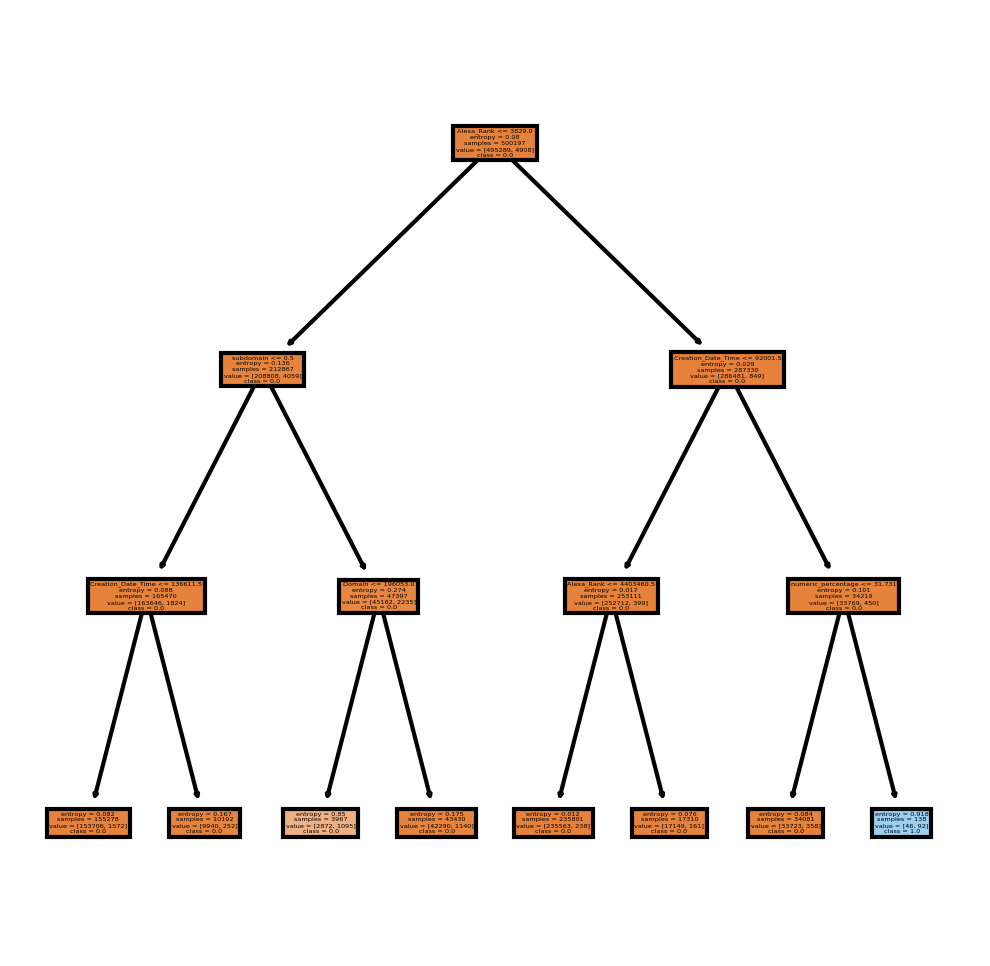

In [466]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y_train).astype('str'),
               filled = True)
plt.show()

'll iterate over values of max_depth ranging from 1 to 3 and plot the accuracy of the models on training and test sets:

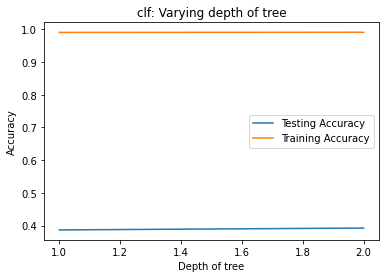

In [467]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 3)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

# Now, I'll make predictions on My test set

Now, you'll make predictions on our test set, create a new column 'Label' and store your predictions in it. Save 'Domain' and 'Survived' columns of data_test to a .csv 

In [468]:
# Make predictions and store in 'Label' column of data_test
y_pred = clf.predict(X_test)


In [469]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [470]:
test_features['label']=""
test_features = test_features[['Country','IP', 'Domain', 'Creation_Date_Time','Alexa_Rank', 'len','1gram','entropy','tld','3gram','2gram','label']]

test_features 

,Country,IP,Domain,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0,5435.0,9,375,3.169925,69,176,176,
500199,43,0,273,0,3231.0,12,350,3.584963,24,273,273,
500200,43,0,273,0,3231.0,12,350,3.584963,24,273,273,
500201,43,0,160,0,3231.0,21,247,3.916127,24,160,160,
500202,43,0,160,0,3231.0,21,247,3.916127,24,160,160,
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,0,-1.0,19,717,3.576618,24,96,96,
502319,45,0,96,0,-1.0,19,717,3.576618,24,96,96,
502320,30,0,489,0,-1.0,9,576,2.725481,94,489,489,
502321,30,0,489,0,-1.0,9,576,2.725481,94,489,489,


In [471]:
test_features['label'] = y_pred

In [472]:
test_features

,Country,IP,Domain,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0,5435.0,9,375,3.169925,69,176,176,0.0
500199,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500200,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500201,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
500202,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502319,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502320,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0
502321,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0


# Save Prediction  to csv file

In [72]:
test_features[['Domain', 'label']].to_csv('Predictions/1st_dec_tree.csv', index=False)

In [473]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.3924705882352941


Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made.

In [474]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.015


Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics

In [475]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.029


# Classification Report

In [476]:
from sklearn.metrics import classification_report

In [477]:
target_names = ['Benign 0', 'Phishing 1']

In [478]:
print(classification_report(y_test, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.39      0.99      0.56       822
  Phishing 1       0.73      0.01      0.03      1303

    accuracy                           0.39      2125
   macro avg       0.56      0.50      0.29      2125
weighted avg       0.60      0.39      0.23      2125



In [479]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [480]:
print(cnf_matrix)

[[ 815    7]
 [1284   19]]


In [481]:
# Plot confusion matrix code taken from documentation
"""Use this method directly - """
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 815    7]
 [1284   19]]


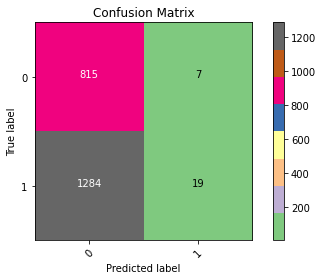

In [482]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

# RANDOM FORESTS:

# PiPeline with One-hot encode the training data containing Category features 

In [500]:
X_train

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0,233,54638,165714,0,10,0,0,0,155362,126,154880,155341
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0,0,0,165714,0,10,0,0,0,155362,126,154880,155341
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0,271,85348,165601,0,29622,3385,0,104124,155248,184,154766,155227
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0,159,111391,4239,0,146508,2134,435,55369,16217,673,3979,4081
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0,233,171502,83161,0,10,0,0,0,78019,427,220320,78011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0,0,0,175747,0,167037,47733,1485,47040,164827,184,164307,164803
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0,159,110776,222915,0,10,0,0,0,209025,281,208381,208991
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0,0,0,222915,0,10,0,0,0,209025,281,208381,208991
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0,269,91137,219430,0,249106,47754,0,15878,205848,673,205224,205818


In [501]:
y_train

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
500192    0.0
500193    0.0
500194    0.0
500195    0.0
500196    0.0
Name: label, Length: 500197, dtype: float64

In [502]:
X_test

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy,Country,IP,Domain,Registrant_Name,Domain_Age,Emails,Organization,Creation_Date_Time,1gram,tld,3gram,2gram
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925,43,0,176,0,0,0,0,0,375,69,176,176
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963,43,0,273,0,0,0,0,0,350,24,273,273
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127,43,0,160,0,0,0,0,0,247,24,160,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618,45,0,96,0,0,0,0,0,717,24,96,96
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,0,0,0,576,94,489,489
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481,30,0,489,0,0,97,0,0,576,94,489,489


In [503]:
y_test

500198    0.0
500199    0.0
500200    0.0
500201    0.0
500202    0.0
         ... 
502318    1.0
502319    1.0
502320    1.0
502321    1.0
502322    1.0
Name: label, Length: 2125, dtype: float64

In [35]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
#ohe = OneHotEncoder()
#X_train = ohe.fit(X_train)

In [36]:
#X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
#ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

#ohe_df.head()

In [487]:

from sklearn.ensemble import RandomForestClassifier

In [488]:
#X_test_ohe = ohe.transform(X_test)
#y_preds = clf.predict(X_test_ohe)

#print('Accuracy: ', accuracy_score(y_test, y_preds))

In [489]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names='true'),
    SimpleImputer(strategy='constant'),
    RandomForestClassifier(n_estimators=110, random_state=42, n_jobs=-1)
)

# fit on train, score on val
pipeline.fit(X_train, y_train)
print('Training accuracy', pipeline.score(X_train, y_train))
print('Validation accuracy', pipeline.score(X_test, y_test))

Training accuracy 0.9999360252060688
Validation accuracy 0.38682352941176473


In [490]:
test_features 

,Country,IP,Domain,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0,5435.0,9,375,3.169925,69,176,176,0.0
500199,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500200,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500201,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
500202,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502319,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502320,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0
502321,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0


In [491]:
y_pred = pipeline.predict(X_test)

In [492]:
test_features['label'] = y_pred

In [493]:
test_features

,Country,IP,Domain,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0,5435.0,9,375,3.169925,69,176,176,0.0
500199,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500200,43,0,273,0,3231.0,12,350,3.584963,24,273,273,0.0
500201,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
500202,43,0,160,0,3231.0,21,247,3.916127,24,160,160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502319,45,0,96,0,-1.0,19,717,3.576618,24,96,96,0.0
502320,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0
502321,30,0,489,0,-1.0,9,576,2.725481,94,489,489,0.0


In [98]:
test_features[['Domain', 'label']].to_csv('Predictions/1st_Random_Forests.csv', index=False)

In [99]:
test_features[['Domain', 'label']]

,Domain,label
500198,ecnavi.jp,0.0
500199,hubpages.com,0.0
500200,hubpages.com,0.0
500201,discover.hubpages.com,0.0
500202,discover.hubpages.com,0.0
...,...,...
502318,c1781279.ferozo.com,0.0
502319,c1781279.ferozo.com,0.0
502320,rusnod.ru,0.0
502321,rusnod.ru,0.0


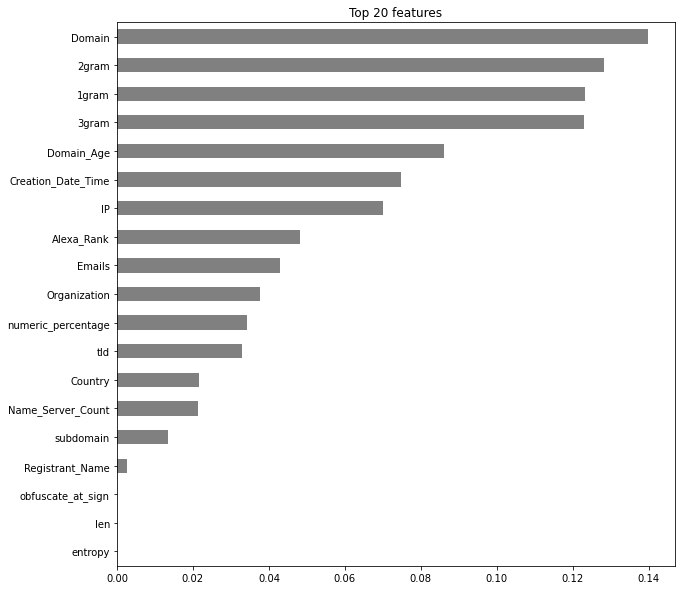

In [494]:
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
tree = pipeline.named_steps['randomforestclassifier']
feature_names = encoder.transform(X_test).columns
importances = pd.Series(tree.feature_importances_, feature_names)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [166]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


[Text(741.5908033813241, 537.5600000000001, 'Alexa_Rank <= 3829.0\ngini = 0.019\nsamples = 316408\nvalue = [495309, 4888]\nclass = 0.0'),
 Text(673.1641178790422, 525.48, 'Country <= 280.5\ngini = 0.037\nsamples = 134333\nvalue = [208428, 4042]\nclass = 0.0'),
 Text(639.7429186921863, 513.4, 'Alexa_Rank <= 3825.5\ngini = 0.037\nsamples = 134324\nvalue = [208427, 4029]\nclass = 0.0'),
 Text(573.8988306256012, 501.32000000000005, 'numeric_percentage <= 31.311\ngini = 0.037\nsamples = 134281\nvalue = [208423, 3965]\nclass = 0.0'),
 Text(443.2089647995574, 489.24, 'subdomain <= 0.5\ngini = 0.035\nsamples = 133432\nvalue = [207356, 3735]\nclass = 0.0'),
 Text(340.20349952063424, 477.16, 'Creation_Date_Time <= 136611.5\ngini = 0.021\nsamples = 103831\nvalue = [162679, 1751]\nclass = 0.0'),
 Text(316.9232561230695, 465.08000000000004, 'Country <= 271.5\ngini = 0.019\nsamples = 97523\nvalue = [152920, 1496]\nclass = 0.0'),
 Text(287.9007936296993, 453.0, 'Emails <= 52216.5\ngini = 0.021\nsampl

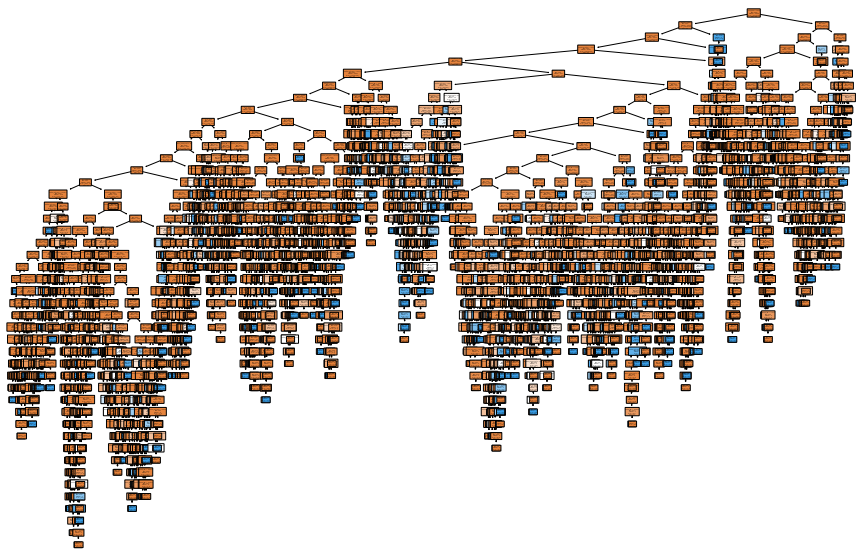

In [495]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(tree.estimators_[4], 
           feature_names = X_train.columns, 
           class_names=np.unique(y_train).astype('str'), 
          filled=True, impurity=True, 
          rounded=True)

# Classification Report

In [496]:
print(classification_report(y_test, y_pred,target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.39      1.00      0.56       822
  Phishing 1       0.00      0.00      0.00      1303

    accuracy                           0.39      2125
   macro avg       0.19      0.50      0.28      2125
weighted avg       0.15      0.39      0.22      2125



C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [497]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [498]:
cnf_matrix

array([[ 822,    0],
       [1303,    0]], dtype=int64)

Confusion matrix, without normalization
[[ 822    0]
 [1303    0]]


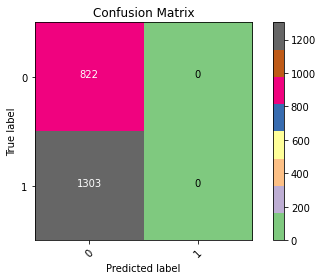

In [499]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

# LOGESTIC REGRESSION:

In [693]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(class_weight='balanced')
sd=logreg.fit(X_train,y_train)
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

C:\Users\PC1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5556570711139811, 0.56)

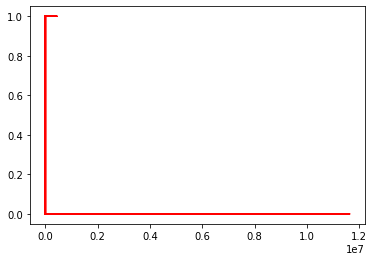

In [694]:
plt.plot(X_test, y_test, color='red')

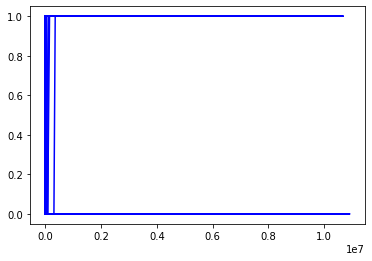

In [506]:
plt.plot(X_train, y_train, color='blue')

##  Predictions

Now, you'll make predictions on our test set, create a new column 'Label' and store your predictions in it. Save 'Domain' and 'Survived' columns of data_test to a .csv 

In [695]:
# Make predictions and store in 'Label' column of data_test
y_pred = sd.predict(X_test)
test_features['label'] = y_pred
test_features

,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0.0,0.0,0.000000,0,0,0,0,4.0,0,5435.0,9,375,3.169925,69,176,176,1.0
500199,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,1.0
500200,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,1.0
500201,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,1.0
500202,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,1.0
502319,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,1.0
502320,30,0,489,0.0,0.0,0.000000,0,0,0,0,2.0,0,-1.0,9,576,2.725481,94,489,489,1.0
502321,30,0,489,0.0,0.0,0.000000,0,0,97,0,2.0,0,-1.0,9,576,2.725481,94,489,489,0.0


In [696]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.56


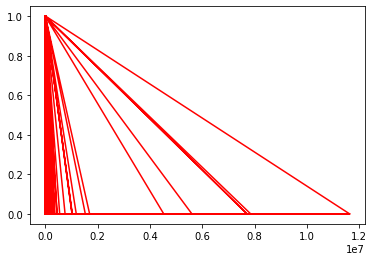

In [605]:
plt.plot(X_test, y_pred, color='red')

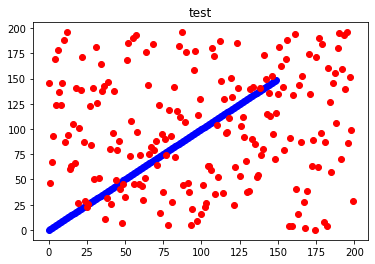

In [606]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(150)
y_pred = np.random.randint(0, 200, 200)

plotGraph(y_test, y_pred, "test")

In [117]:
logreg.predict_proba(X_test)

array([[0.50005695, 0.49994305],
       [0.50003385, 0.49996615],
       [0.50003385, 0.49996615],
       ...,
       [0.49999999, 0.50000001],
       [0.49999999, 0.50000001],
       [0.49999999, 0.50000001]])

In [118]:
test_features[['Domain', 'label']].to_csv('Predictions/1st_LogisticRegression.csv', index=False)

# Classification Report

In [697]:
print(classification_report(y_test, y_pred,target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.45      0.68      0.55       822
  Phishing 1       0.71      0.48      0.57      1303

    accuracy                           0.56      2125
   macro avg       0.58      0.58      0.56      2125
weighted avg       0.61      0.56      0.56      2125



In [698]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[563 259]
 [676 627]]


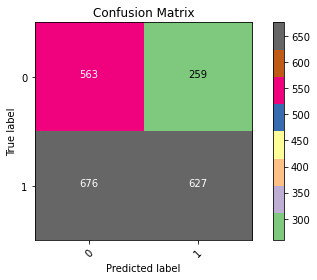

In [699]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

### Fold Cross-Validation Using Multinomial Logistic Regression
    
   Often, models are evaluated by training on one subset of the data, and predicting/evaluating on a held-out set. To improve on this technique, we can split all of our data into k subsets, and repeat the train/evaluate process k times, each time training on k-1 partitions and evaluating on the remaining partition. This gives us a lower-variance, higher-confidence performance estimate than simply evaluating on a single held out set. This process is known as [cross-validation](https://www.cs.cmu.edu/~schneide/tut5/node42.html)
    
   We will perform 10-fold cross-validation, using the weighted [F1 score](https://en.wikipedia.org/wiki/F1_score), on multiple combinations of featuresets. Specifically, we will start with a single feature (word n-grams), and add featuresets one at a time to later evaluate the impact of each feature on model performance.

   We will use a Maximum Entropy (multinomial Logistic Regression) model as the classifier. The parameter values should provide good performance, but could likely be improved with Grid Search over the hyperparameter space.

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold

In [ ]:
f1_scores_dist = {}

In [ ]:
def train_and_evaluate(train_X, train_y, test_X, test_y, print_report=False):
    """
    Train a Maximum Entropy model and calculate the f1 score on a test 
    partition. Optionally, print a classification report.
    """
    #
    # As an exercise, try playing with these hyperparameters.
    # 
    #
    clf = LogisticRegression(C=100., fit_intercept=True, multi_class='auto')
    
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)

    if print_report:
        print(classification_report(test_y, predictions))

    f1 = f1_score(test_y, predictions, average='weighted')        
    return f1, clf, predictions

In [ ]:
n_splits = 10
seed = 12345
cv = KFold(n_splits=n_splits, random_state=seed)
folds_indeces = list(cv.split(train_df.index))

In [ ]:
def xval_with_weighted_f1(folds, feature_functions):
    """
    Run cross-validation on `folds` folds, extracting features with the
    feature functions provided.
    
    Parameters
    ----------
    folds: int
        The number of folds.
    
    feature_functions: list of callable
        The feature functions that will be used to generate features for xval.
    
    Returns
    -------
    list of floats
        The weighted f1 score for each fold.
        
    """
    
    feature_vectorizer = DictVectorizer()
    scores = []
    
    feature_dict_func = lambda q: create_full_feature_dict(q, feature_functions)
    
    for i, (train_index, val_index) in enumerate(folds_indeces):
        train_rows = train_df.iloc[train_index]
        train_labels = train_rows.coarse_label
        train_questions = train_rows.processed_question
        train_feature_dicts = train_questions.apply(feature_dict_func)
        train_X = feature_vectorizer.fit_transform(train_feature_dicts)
        
        test_rows = train_df.iloc[val_index]
        test_labels = test_rows.coarse_label
        test_questions = test_rows.processed_question
        test_feature_dicts = test_questions.apply(feature_dict_func)
        test_X = feature_vectorizer.transform(test_feature_dicts)
        
        f1_score, clf, preds = train_and_evaluate(train_X, train_labels, test_X, test_labels)
        scores.append(f1_score)
        
    return scores, (feature_vectorizer, clf, preds, test_labels)

In [ ]:
#
# Calculate the f1-score for each fold of a variety of feature combinations.
#

featureset_score_tracker = {}
current_features_to_use = {}
feature_names = []
for feature_func, kwargs in all_feature_functions.items():
    current_features_to_use[feature_func] = kwargs
    feature_names.append(feature_func.__name__)
    experiment_name = "+".join([''.join([w[0] for w in n.split('_')]) for n in feature_names])
    weighted_f1_dist, (feature_vectorizer, clf, preds, test_labels) = xval_with_weighted_f1(10, 
                                                                               current_features_to_use)
    print("{}: {}".format(experiment_name, weighted_f1_dist))
    featureset_score_tracker[experiment_name] = weighted_f1_dist

### Interpreting Coefficients
We can take the 10th fold of our most recent model (the one that used all of the features together), and which features the model found most impactful in the training data. We do this by using `<model>.coef_[i]`, where `i` is the index of the label of interest. The higher the coefficient value for a feature, the more impact it has on the final prediction. Below we list the top 20 features for each coarse-grained label.

In [ ]:
for i, label in enumerate(('ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM')):
    top_features = sorted(list(zip(feature_vectorizer.get_feature_names(), 
                                   clf.coef_[i])), 
                          key=lambda t: t[1], 
                          reverse=True)[:20]
    print(label)
    for feature_name, weight in top_features:
        print("{}".format(feature_name))
    print('\n')

### Plot Confusion Matrix for 10th Fold

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_confusion_matrix(cm, labels=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    fig.colorbar(cax)
    if labels:
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

labels = sorted(set(test_labels))
cm = confusion_matrix(test_labels, preds, labels=labels)
row_sums = cm.sum(axis=1)
normalized_cm = cm / row_sums[:, np.newaxis]

plot_confusion_matrix(normalized_cm, labels=labels)

### Plot Cross-Validated F1-score for Different Featuresets

In [ ]:
#
# Draw box-and-whisker plots to show the performances over all 10 folds for each 
# featureset combination.
#
labels = sorted(featureset_score_tracker.keys(), key=len)
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111)
data_to_plot = [featureset_score_tracker[l] for l in labels]
ax.boxplot(data_to_plot)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Weighted F1")
plt.title("Comparison of Some Feature Combinations")
plt.grid(True)
plt.show()

### Train on Entire Training Set and Evaluate on Heldout Data
Now that we have explored how our model performs on different folds of the training data, let's see how well it generalizes to the held-out test set.

In [ ]:
feature_function = lambda q: create_full_feature_dict(q, all_feature_functions)

train_labels = train_df.coarse_label
train_questions = train_df.processed_question
train_feature_dicts = train_questions.apply(feature_function)
train_X = feature_vectorizer.fit_transform(train_feature_dicts)

test_labels = test_df.coarse_label
test_questions = test_df.processed_question
test_feature_dicts = test_questions.apply(feature_function)
test_X = feature_vectorizer.transform(test_feature_dicts)

_, _, preds = train_and_evaluate(train_X, train_labels, test_X, test_labels, print_report=True)

<u> Explore/Combine different models </u>: There are so many ways to model the features we have extracted here. We had some success using a Maximum Entropy model, but you may get some interesting results by using, for instance, a tree-based model instead. Ensemble methods, which use multiple classifiers to improve the final predictions, are also worth exploring here.

# K-Nearest Neighbors (K-NN)

In [348]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Scaling

In [815]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

 # avoid data leakage

In [816]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [817]:

print(X_train)

[[-0.6944135  -0.01025784  0.55750772 ... -0.87729299  0.68703391
   0.70442417]
 [-0.6944135  -0.01025784  0.55750772 ... -0.87729299  0.68703391
   0.70442417]
 [-0.6944135  -0.01025784 -0.2061333  ... -0.6473756   0.68525055
   0.7026339 ]
 ...
 [-0.6944135  -0.01025784 -0.2061333  ... -0.26285859  1.52398017
   1.54695206]
 [-0.6944135  -0.01025784 -0.2061333  ...  1.29106583  1.47459344
   1.49712278]
 [-0.6944135  -0.01025784 -0.2061333  ... -0.62359104 -0.84695821
  -0.83973393]]


In [818]:
print(y_train)

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
500192    0.0
500193    0.0
500194    0.0
500195    0.0
500196    0.0
Name: label, Length: 500197, dtype: float64


In [819]:
print(X_test)

[[-0.6944135  -0.01025784 -0.2061333  ... -1.10324628 -1.73308783
  -1.73231096]
 [-0.6944135  -0.01025784 -0.2061333  ... -1.28163046 -1.7315704
  -1.73078766]
 [-0.6944135  -0.01025784 -0.2061333  ... -1.28163046 -1.7315704
  -1.73078766]
 ...
 [-0.6944135  -0.01025784 -0.2061333  ... -1.00414396 -1.72819139
  -1.72739556]
 [-0.6944135  -0.01025784 -0.2061333  ... -1.00414396 -1.72819139
  -1.72739556]
 [-0.6944135  -0.01025784 -0.2061333  ... -1.00414396 -1.72819139
  -1.72739556]]


In [820]:
print(X_test.dtype)

float64


In [821]:
print(y_test)

500198    0.0
500199    0.0
500200    0.0
500201    0.0
500202    0.0
         ... 
502318    1.0
502319    1.0
502320    1.0
502321    1.0
502322    1.0
Name: label, Length: 2125, dtype: float64


# Training the K-NN model on the Training set

In [718]:
from math import sqrt
class KNN():
    def __init__(self,k):
        self.k=k
        print(self.k)
    def fit(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train
    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
        return sqrt(distance)
    def nearest_neighbors(self,test_sample):
        distances=[]#calculate distances from a test sample to every sample in a training set
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
        distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
        neighbors=[]
        for i in range(self.k): #get first k samples
            neighbors.append(distances[i][0])
        return neighbors
    def predict(self,test_set):
        predictions=[]
        for test_sample in test_set:
            neighbors=self.nearest_neighbors(test_sample)
            labels=[sample for sample in neighbors]
            prediction=max(labels,key=labels.count)
            predictions.append(prediction)
        return predictions

In [719]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [822]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.


In [823]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [722]:
X_test

array([[-0.6944135 , -0.01025784, -0.2061333 , ..., -1.10324628,
        -1.73308783, -1.73231096],
       [-0.6944135 , -0.01025784, -0.2061333 , ..., -1.28163046,
        -1.7315704 , -1.73078766],
       [-0.6944135 , -0.01025784, -0.2061333 , ..., -1.28163046,
        -1.7315704 , -1.73078766],
       ...,
       [-0.6944135 , -0.01025784, -0.2061333 , ..., -1.00414396,
        -1.72819139, -1.72739556],
       [-0.6944135 , -0.01025784, -0.2061333 , ..., -1.00414396,
        -1.72819139, -1.72739556],
       [-0.6944135 , -0.01025784, -0.2061333 , ..., -1.00414396,
        -1.72819139, -1.72739556]])

# Predicting the Test set results

In [723]:
y_test

500198    0.0
500199    0.0
500200    0.0
500201    0.0
500202    0.0
         ... 
502318    1.0
502319    1.0
502320    1.0
502321    1.0
502322    1.0
Name: label, Length: 2125, dtype: float64

In [824]:
# Make predictions and store in 'Label' column of data_test
y_pred = classifier.predict(X_test)
test_features['label'] = y_pred
test_features

,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0.0,0.0,0.000000,0,0,0,0,4.0,0,5435.0,9,375,3.169925,69,176,176,0.0
500199,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,0.0
500200,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,0.0
500201,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,0.0
500202,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,0.0
502319,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,0.0
502320,30,0,489,0.0,0.0,0.000000,0,0,0,0,2.0,0,-1.0,9,576,2.725481,94,489,489,0.0
502321,30,0,489,0.0,0.0,0.000000,0,0,97,0,2.0,0,-1.0,9,576,2.725481,94,489,489,0.0


In [ ]:
predictions=model.predict(X_test)#My Own model's predictions

# Making the Confusion Matrix to compare both models

In [725]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 822    0]
 [1303    0]]


0.38682352941176473

In [ ]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

In [727]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 822    0]
 [1303    0]]


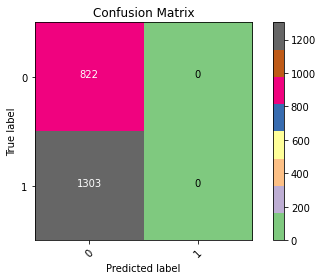

In [728]:
plot_confusion_matrix(cm,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

# Visualising the Test set results

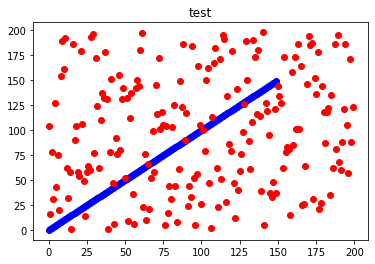

In [729]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(150)
y_pred = np.random.randint(0, 200, 200)

plotGraph(y_test, y_pred, "test")

# Classification Report

In [825]:
print(classification_report(y_test, y_pred,target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.39      1.00      0.56       822
  Phishing 1       0.00      0.00      0.00      1303

    accuracy                           0.39      2125
   macro avg       0.19      0.50      0.28      2125
weighted avg       0.15      0.39      0.22      2125



C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [378]:
pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Note: you may need to restart the kernel to use updated packages.


# Multilayer Perceptron with TensorFlow 2.0 and Keras

In [826]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Configuration options

In [831]:

# Configuration options
feature_vector_length = 19
num_classes = 1

In [832]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (19,)


# Create the model

In [833]:

model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# Configure the model and start training

In [834]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)


Epoch 1/10
1601/1601 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
1601/1601 [==============================] - 7s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
1601/1601 [==============================] - 7s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
1601/1601 [==============================] - 8s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
1601/1601 [==============================] - 7s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
1601/1601 [==============================] - 7s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
1601/1601 [==============================] - 7s 4ms/s

# Test the model after training

In [835]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

67/67 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6132
Test results - Loss: 0.0 - Accuracy: 0.6131764650344849%


# Predection 

In [836]:
# Make predictions and store in 'Label' column of data_test
y_pred = model.predict(X_test)
test_features['label'] = y_pred
test_features

67/67 [==============================] - 1s 2ms/step


,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0.0,0.0,0.000000,0,0,0,0,4.0,0,5435.0,9,375,3.169925,69,176,176,1.0
500199,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,1.0
500200,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,1.0
500201,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,1.0
500202,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,1.0
502319,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,1.0
502320,30,0,489,0.0,0.0,0.000000,0,0,0,0,2.0,0,-1.0,9,576,2.725481,94,489,489,1.0
502321,30,0,489,0.0,0.0,0.000000,0,0,97,0,2.0,0,-1.0,9,576,2.725481,94,489,489,1.0


In [837]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,y_pred)) 

[[   0  822]
 [   0 1303]]


# Classification Report

In [838]:
print(classification_report(y_test, y_pred,target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.00      0.00      0.00       822
  Phishing 1       0.61      1.00      0.76      1303

    accuracy                           0.61      2125
   macro avg       0.31      0.50      0.38      2125
weighted avg       0.38      0.61      0.47      2125



C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [839]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[   0  822]
 [   0 1303]]


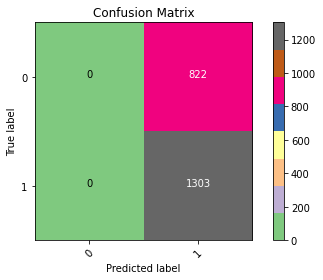

In [840]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

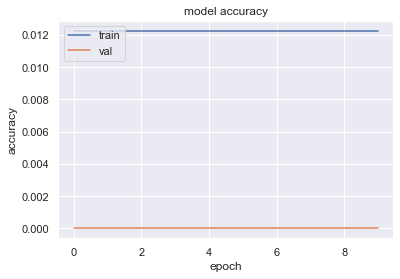

In [527]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

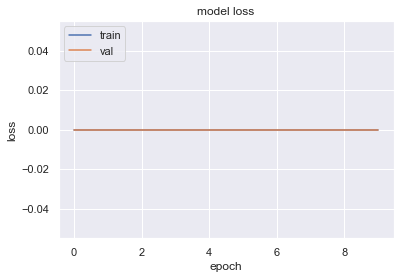

In [528]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

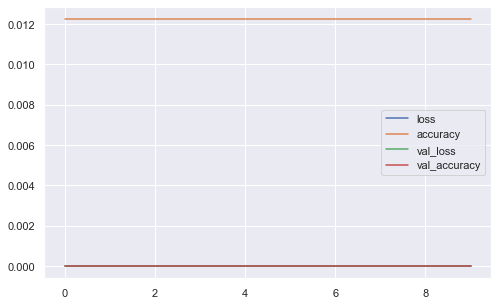

In [529]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [531]:
y_train

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
500192    0.0
500193    0.0
500194    0.0
500195    0.0
500196    0.0
Name: label, Length: 500197, dtype: float64

In [533]:
X_test

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
500198,0.0,0.0,0.000000,4.0,5435.0,9,3.169925
500199,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500200,0.0,0.0,0.000000,4.0,3231.0,12,3.584963
500201,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
500202,0.0,0.0,0.000000,4.0,3231.0,21,3.916127
...,...,...,...,...,...,...,...
502318,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502319,1.0,1.0,0.368421,0.0,-1.0,19,3.576618
502320,0.0,0.0,0.000000,2.0,-1.0,9,2.725481
502321,0.0,0.0,0.000000,2.0,-1.0,9,2.725481


In [532]:
X_train

,subdomain,obfuscate_at_sign,numeric_percentage,Name_Server_Count,Alexa_Rank,len,entropy
0,0.0,0.0,3.225806,0.0,-1.0,1,1.0
1,0.0,0.0,3.225806,0.0,-1.0,1,1.0
2,0.0,0.0,0.000000,4.0,-1.0,1,1.0
3,0.0,0.0,4.761905,4.0,-1.0,1,1.0
4,0.0,0.0,0.000000,0.0,44394.0,1,1.0
...,...,...,...,...,...,...,...
500192,0.0,0.0,0.000000,2.0,876461.0,1,1.0
500193,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500194,0.0,0.0,0.000000,0.0,-1.0,1,1.0
500195,0.0,0.0,0.000000,6.0,372895.0,1,1.0


# Gaussian-Naive-Bayes Model

In [841]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [842]:
gnb = GaussianNB()

In [843]:
gnb

GaussianNB()

In [844]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
#X,Y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0, random_state=5)
# Random_state fixes the dataset

In [845]:
print(X_train.shape) # Continous value features 

(500197, 19)


In [846]:
# Train our classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [847]:
gnb.score(X_train, y_train) # This methods internally computes the accuracy between original and predicted.

0.023126888006125588

In [848]:
# Make predictions and store in 'Label' column of data_test
y_pred = gnb.predict(X_test)
test_features['label'] = y_pred
test_features

,Country,IP,Domain,subdomain,obfuscate_at_sign,numeric_percentage,Registrant_Name,Domain_Age,Emails,Organization,Name_Server_Count,Creation_Date_Time,Alexa_Rank,len,1gram,entropy,tld,3gram,2gram,label
500198,43,0,176,0.0,0.0,0.000000,0,0,0,0,4.0,0,5435.0,9,375,3.169925,69,176,176,0.0
500199,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,0.0
500200,43,0,273,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,12,350,3.584963,24,273,273,0.0
500201,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,0.0
500202,43,0,160,0.0,0.0,0.000000,0,0,0,0,4.0,0,3231.0,21,247,3.916127,24,160,160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502318,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,0.0
502319,45,0,96,1.0,1.0,0.368421,0,0,0,0,0.0,0,-1.0,19,717,3.576618,24,96,96,0.0
502320,30,0,489,0.0,0.0,0.000000,0,0,0,0,2.0,0,-1.0,9,576,2.725481,94,489,489,0.0
502321,30,0,489,0.0,0.0,0.000000,0,0,97,0,2.0,0,-1.0,9,576,2.725481,94,489,489,0.0


In [849]:
np.sum(y_pred==y_test) # The number of cases where the prediction is right

822

In [850]:
acc = np.sum(y_pred==y_test)/X_test.shape[0]

In [851]:
print(acc) # So, the accuracy computed from score() method and the manual method is same.

0.38682352941176473


In [852]:
print('Accuracy: ', accuracy_score(y_test, y_pred))  

Accuracy:  0.38682352941176473


# Generate Confusion Matrix

In [853]:
from sklearn.metrics import confusion_matrix

In [854]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [855]:
print(cnf_matrix)

[[ 822    0]
 [1303    0]]


# Visualising Confusion Matrix

In [856]:
# Plot confusion matrix code taken from documentation
"""Use this method directly - """
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 822    0]
 [1303    0]]


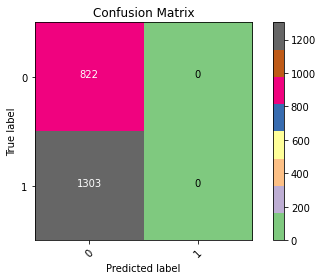

In [857]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

# Classification Report

In [858]:
print(classification_report(y_test, y_pred,target_names=target_names)) 

              precision    recall  f1-score   support

    Benign 0       0.39      1.00      0.56       822
  Phishing 1       0.00      0.00      0.00      1303

    accuracy                           0.39      2125
   macro avg       0.19      0.50      0.28      2125
weighted avg       0.15      0.39      0.22      2125



C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
